In [12]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

1.

In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing flipper_length_mm or species data
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Get the unique species
species = penguins['species'].unique()

# Create subplots for each species
fig = go.Figure()

for sp in species:
    # Filter data for the current species
    species_data = penguins[penguins['species'] == sp]['flipper_length_mm']

    # Mean, Median, Standard Deviation, IQR, and Range
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    min_value = species_data.min()
    max_value = species_data.max()

    # Histogram for each species
    fig.add_trace(go.Histogram(x=species_data, name=sp, opacity=0.75))

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color="blue", dash="dash"), annotation_text=f"{sp} Mean", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color="green", dash="dot"), annotation_text=f"{sp} Median", annotation_position="top left")

    # Add rectangles for different ranges
    # Range (min to max)
    fig.add_vrect(x0=min_value, x1=max_value, fillcolor="lightblue", opacity=0.2, line_width=0, annotation_text=f"{sp} Range")

    # IQR (q1 to q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.2, line_width=0, annotation_text=f"{sp} IQR")

    # 2 Standard deviations around the mean
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, fillcolor="pink", opacity=0.2, line_width=0, annotation_text=f"{sp} 2 Std Dev")

# Update layout for better visualization
fig.update_layout(barmode='overlay', title="Flipper Length Distribution with Statistical Markers", xaxis_title="Flipper Length (mm)", yaxis_title="Count")

# Show the plot
fig.show()


2.

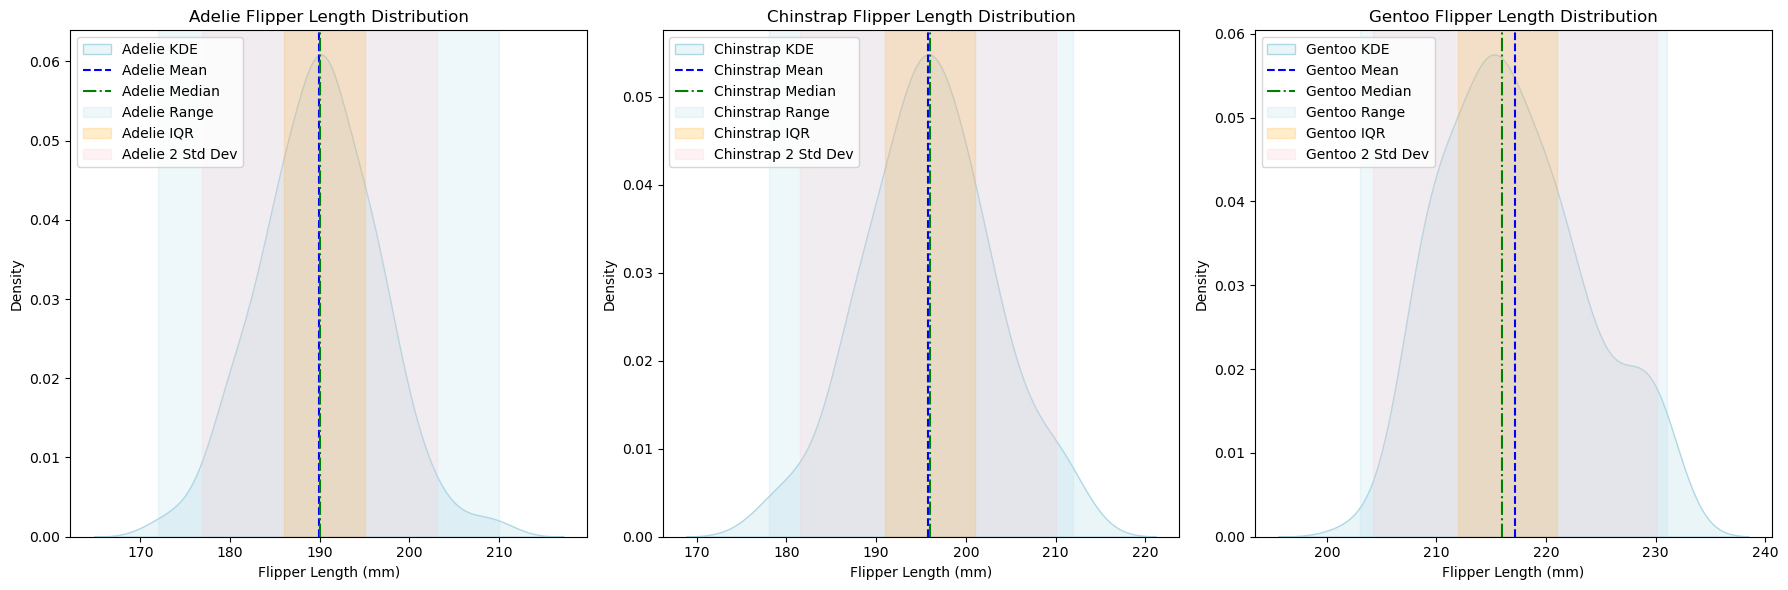

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing flipper_length_mm or species data
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Get the unique species
species = penguins['species'].unique()

# Create the plot grid (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop over the species and plot KDE
for i, sp in enumerate(species):
    # Filter data for the current species
    species_data = penguins[penguins['species'] == sp]['flipper_length_mm']

    # Mean, Median, Standard Deviation, IQR, and Range
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    min_value = species_data.min()
    max_value = species_data.max()

    # KDE Plot
    sns.kdeplot(species_data, ax=axes[i], fill=True, color='lightblue', label=f'{sp} KDE')

    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='blue', linestyle='--', label=f'{sp} Mean')
    axes[i].axvline(median, color='green', linestyle='-.', label=f'{sp} Median')

    # Add shaded areas for ranges
    # Range (min to max)
    axes[i].axvspan(min_value, max_value, color='lightblue', alpha=0.2, label=f'{sp} Range')

    # IQR (q1 to q3)
    axes[i].axvspan(q1, q3, color='orange', alpha=0.2, label=f'{sp} IQR')

    # 2 Standard deviations around the mean
    axes[i].axvspan(mean - 2*std, mean + 2*std, color='pink', alpha=0.2, label=f'{sp} 2 Std Dev')

    # Set titles and labels
    axes[i].set_title(f'{sp} Flipper Length Distribution')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')

    # Add legend
    axes[i].legend(loc='upper left')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


3.

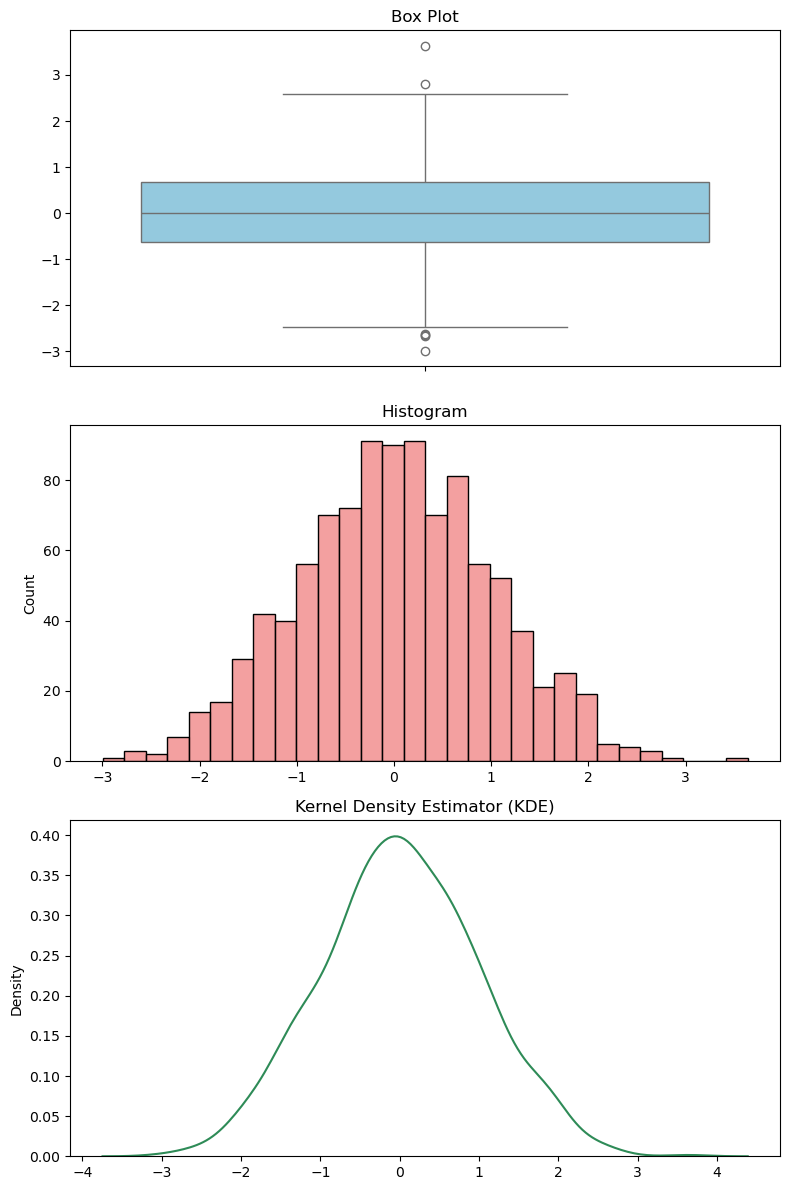

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
data = np.random.normal(loc=0, scale=1, size=1000)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Box Plot
sns.boxplot(data=data, ax=axs[0], color='skyblue')
axs[0].set_title('Box Plot')

# Histogram
sns.histplot(data, bins=30, kde=False, ax=axs[1], color='lightcoral')
axs[1].set_title('Histogram')

# Kernel Density Estimation (KDE)
sns.kdeplot(data, ax=axs[2], color='seagreen')
axs[2].set_title('Kernel Density Estimator (KDE)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Box Plots:
Show summary statistics like the median, quartiles, and outliers.
Pros: Compact, good for comparing distributions, resistant to outliers.
Cons: Doesn’t show the full distribution shape or density details.
Histograms:
Show the frequency of data within defined bins.
Pros: Intuitive, reveals distribution shape (e.g., modes, skewness), direct frequency visualization.
Cons: Bin size affects appearance, can obscure or exaggerate data features.
Kernel Density Estimators (KDEs):
Provide a smoothed, continuous estimate of the data distribution.
Pros: Shows subtle features like multimodal distributions, no need for binning, smoother view of data.
Cons: Sensitive to bandwidth parameter, smoothing can hide true data features, less intuitive than histograms.

box plots excelling in simplicity and comparing multiple groups, histograms in showing raw frequency, and KDEs in highlighting continuous distribution patterns.

My prefernce is the box plots,because it could provide an overall analysis without any missing data,and is more easy to find the critical points like the mean,the 15%,the 75%.Besides that it would also more visual to compare it with other box plots and could easily find the varvaninces changing.

4.

In [12]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1)similar means and similar variances:B and C
2)similar menas but quite different variances:B and D
3)similar variances but quite different means: A and B
4)quite different means and quite different variances: A and D

5.

Right (Positive) Skewness: The mean is typically greater than the median. This is because extreme high values (outliers) pull the mean toward the right tail, while the median (being the middle value) is less affected.
Left (Negative) Skewness: The mean is typically less than the median. This is due to extreme low values pulling the mean toward the left tail.
Why This Happens: The mean is sensitive to outliers, while the median is more robust. When a distribution has a long tail on the right (right-skewed), the mean gets pulled toward that tail. Conversely, a long tail on the left (left-skewed) pulls the mean in the opposite direction.

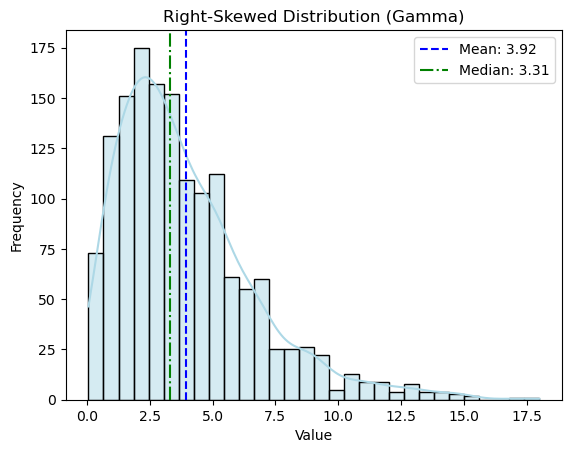

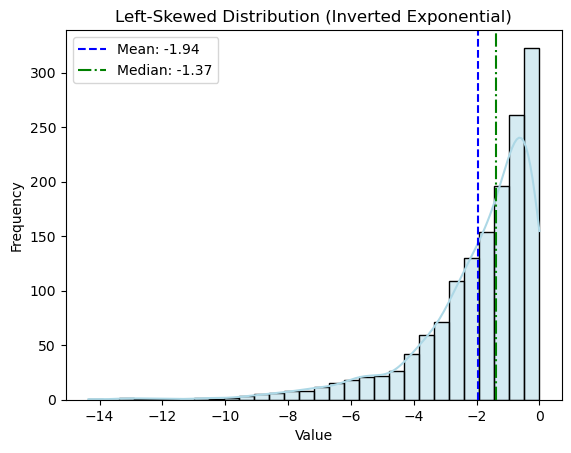

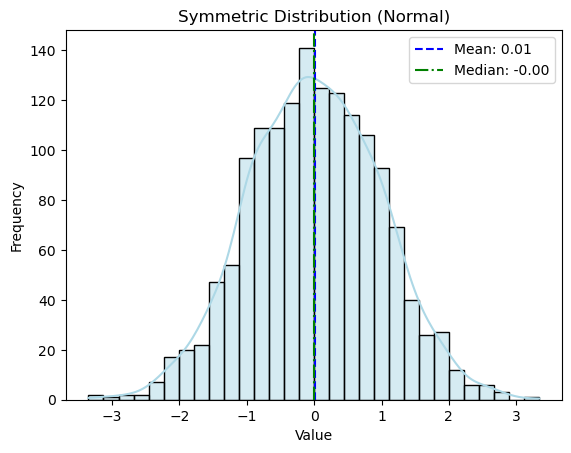

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the data
n = 1500

# Right-skewed distribution (Gamma)
right_skewed = np.random.gamma(2, 2, n)

# Left-skewed distribution (Exponential inverted)
left_skewed = -np.random.exponential(2, n)

# Symmetric distribution (Normal)
symmetric = np.random.normal(0, 1, n)

# Function to calculate mean, median, and plot
def plot_distribution(data, title):
    mean = np.mean(data)
    median = np.median(data)
    
    # Plot using Seaborn
    sns.histplot(data, kde=True, color="lightblue", bins=30)
    plt.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.2f}')
    plt.legend()
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot Right-skewed distribution
plot_distribution(right_skewed, "Right-Skewed Distribution (Gamma)")

# Plot Left-skewed distribution
plot_distribution(left_skewed, "Left-Skewed Distribution (Inverted Exponential)")

# Plot Symmetric distribution
plot_distribution(symmetric, "Symmetric Distribution (Normal)")


Summaries:
1. Data Visualization Comparison:
We discussed the differences between box plots, histograms, and kernel density estimators (KDEs) for visualizing data distributions.
Box Plots: Summarize data using median, quartiles, and outliers.
Histograms: Show frequency distributions across bins.
KDEs: Provide a smoothed, continuous estimation of the probability density function.
We also discussed the pros and cons of each method and when to use them.
2. Plotly Histograms Code:
You provided a code snippet to create histograms of different distributions (uniform, normal, bimodal) using Plotly. We explained the structure and functionality of the code.
Data from various distributions was plotted using subplots, showing different binning and layout adjustments.
Histograms were compared side-by-side to highlight differences in distributions.
3. Mean, Median, and Skewness:
We explored the relationship between the mean and median in right- and left-skewed distributions.
Right-Skewed: Mean > Median due to high outliers.
Left-Skewed: Mean < Median due to low outliers.
We extended the code to demonstrate this relationship using histograms, showing how skewness affects the placement of the mean and median.

6.

/tmp/ipykernel_53/2833855505.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=species_distribution.index, x=species_distribution.values, palette='viridis')
/tmp/ipykernel_53/2833855505.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=personality_distribution.index, x=personality_distribution.values, palette='coolwarm')


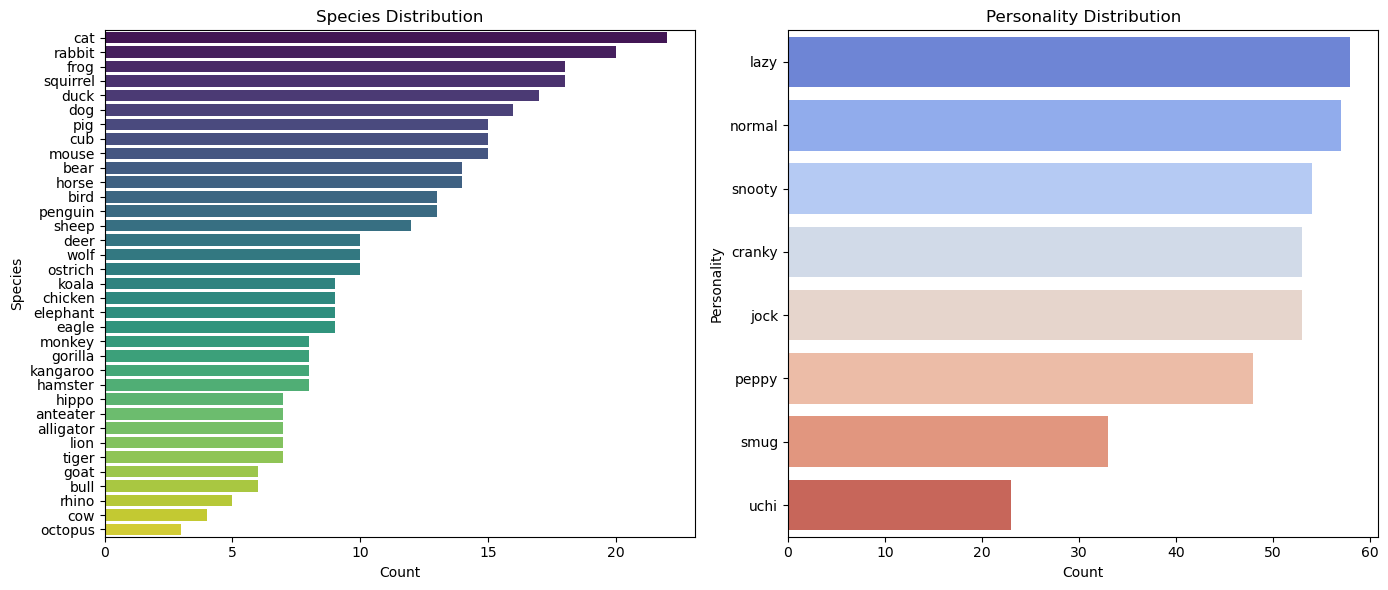

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv"
df = pd.read_csv(url)

# Drop missing values
df_clean = df.dropna()

# Calculate species and personality distributions
species_distribution = df_clean['species'].value_counts()
personality_distribution = df_clean['personality'].value_counts()

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot species distribution
plt.subplot(1, 2, 1)
sns.barplot(y=species_distribution.index, x=species_distribution.values, palette='viridis')
plt.title('Species Distribution')
plt.xlabel('Count')
plt.ylabel('Species')

# Plot personality distribution
plt.subplot(1, 2, 2)
sns.barplot(y=personality_distribution.index, x=personality_distribution.values, palette='coolwarm')
plt.title('Personality Distribution')
plt.xlabel('Count')
plt.ylabel('Personality')

# Display the plots
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv"
df = pd.read_csv(url)

# Drop rows with missing values in specific columns ('id' and 'song')
df_clean = df.dropna(subset=['id', 'song'])

# Summary statistics for numeric and categorical data separately
summary_statistics_numeric = df_clean.describe()  # Numeric columns
summary_statistics_categorical = df_clean.describe(include=['object'])  # Categorical columns

# Check the distribution of species and personality
species_distribution = df_clean['species'].value_counts()
personality_distribution = df_clean['personality'].value_counts()

# Output the summary statistics and distributions
summary_statistics_numeric, summary_statistics_categorical, species_distribution, personality_distribution


(            row_n
 count  379.000000
 mean   238.905013
 std    141.256012
 min      2.000000
 25%    115.500000
 50%    238.000000
 75%    362.500000
 max    483.000000,
              id     name gender species birthday personality          song  \
 count       379      379    379     379      379         379           379   
 unique      379      379      2      35      354           8            92   
 top     admiral  Admiral   male     cat     1-27        lazy  K.K. Country   
 freq          1        1    197      22        2          58            10   
 
          phrase           full_id  \
 count       379               379   
 unique      376               379   
 top     wee one  villager-admiral   
 freq          2                 1   
 
                                                       url  
 count                                                 379  
 unique                                                379  
 top     https://villagerdb.com/images/villagers/thumb/.

   row_n       id     name  gender    species birthday personality  \
0      2  admiral  Admiral    male       bird     1-27      cranky   
1      3  agent-s  Agent S  female   squirrel      7-2       peppy   
2      4    agnes    Agnes  female        pig     4-21        uchi   
3      6       al       Al    male    gorilla    10-18        lazy   
4      7  alfonso  Alfonso    male  alligator      6-9        lazy   

          song    phrase           full_id  \
0   Steep Hill   aye aye  villager-admiral   
1      DJ K.K.  sidekick  villager-agent-s   
2   K.K. House   snuffle    villager-agnes   
3   Steep Hill   Ayyeeee       villager-al   
4  Forest Life  it'sa me  villager-alfonso   

                                                 url  
0  https://villagerdb.com/images/villagers/thumb/...  
1  https://villagerdb.com/images/villagers/thumb/...  
2  https://villagerdb.com/images/villagers/thumb/...  
3  https://villagerdb.com/images/villagers/thumb/...  
4  https://villagerdb.com/i

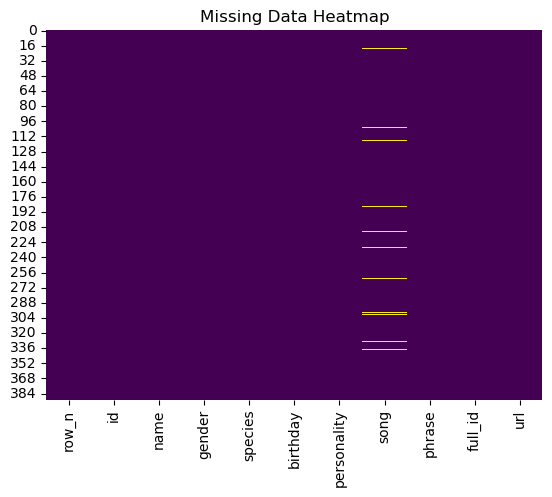

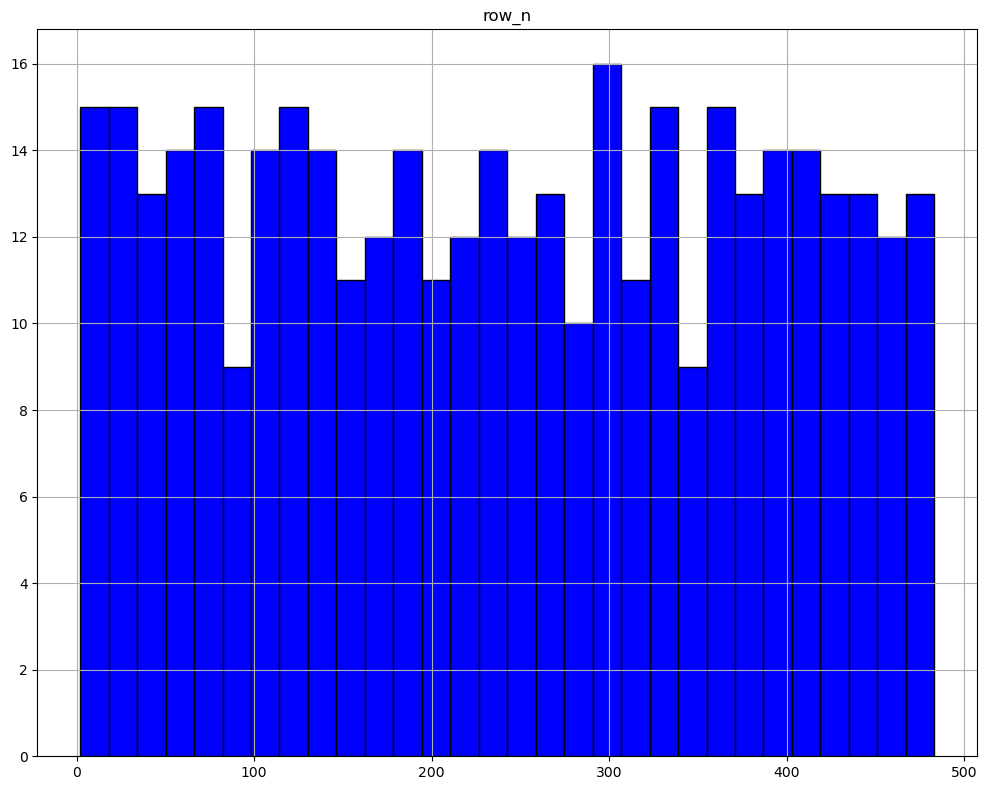

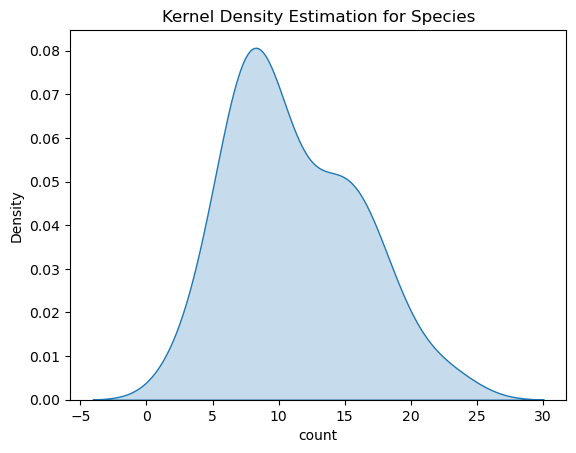

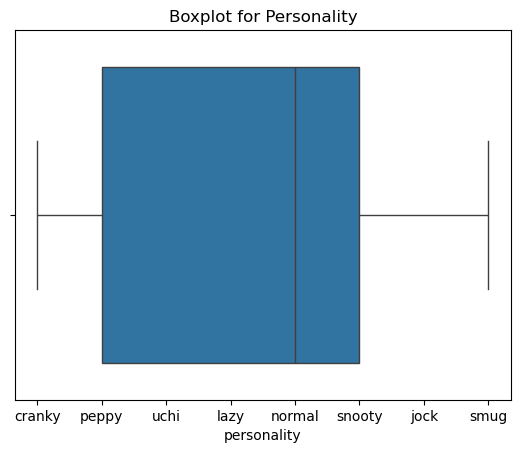

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Display information about the dataset
print(df.info())

# Summary statistics of the dataset
print(df.describe(include='all'))

# Visualize missing data using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Plot histograms for each numerical variable
df.hist(figsize=(10, 8), bins=30, color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

# Kernel Density Estimation plot for a specific column (e.g., 'species')
sns.kdeplot(df['species'].value_counts(), fill=True)
plt.title('Kernel Density Estimation for Species')
plt.show()

# Boxplot for a specific column (e.g., 'personality')
sns.boxplot(data=df, x='personality')
plt.title('Boxplot for Personality')
plt.show()


7.

In [8]:
import plotly.express as px
import pandas as pd

# Load the Gapminder dataset from Plotly
gapminder = px.data.gapminder()

# Display the first few rows of the dataset to understand its structure
print(gapminder.head())

# Create the animated bubble chart
fig = px.scatter(gapminder, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country", 
                 log_x=True, 
                 size_max=60,
                 range_x=[100,100000], 
                 range_y=[25,90])

# Update the layout and style of the chart
fig.update_layout(title="Gapminder Animation: GDP per Capita vs Life Expectancy",
                  xaxis_title="GDP per Capita (Log Scale)",
                  yaxis_title="Life Expectancy",
                  xaxis=dict(tickprefix="$", type='log'),
                  yaxis=dict(ticksuffix=" years"),
                  font=dict(family="Arial, sans-serif", size=14),
                  hoverlabel=dict(font_size=14, font_family="Rockwell"))

# Show the animated plot
fig.show()


       country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4  


8.

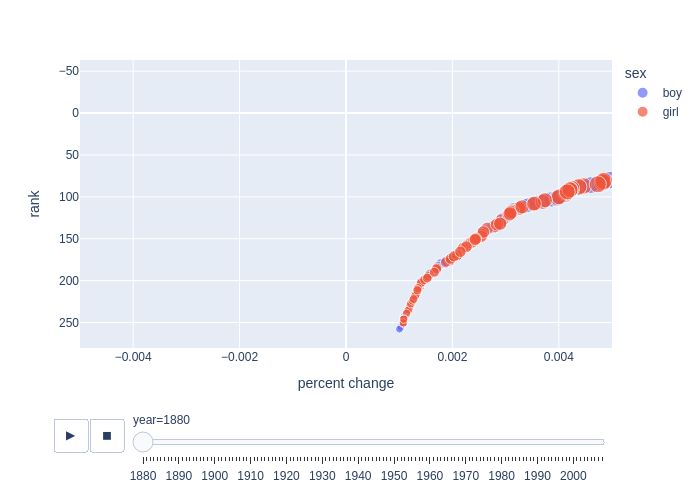

In [15]:
import pandas as pd
import plotly.express as px

# Load the dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct by appending sex to the name
bn['name'] = bn['name'] + " " + bn['sex'] 

# Calculate the rank of names for each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort by name and year to calculate percent change properly
bn = bn.sort_values(['name', 'year'])

# Calculate percent change in name popularity from the previous year
bn['percent change'] = bn['percent'].diff()

# Identify where a new name starts and handle it properly by assigning initial percentage change
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Restrict to "common" names (percent > 0.001)
bn = bn[bn['percent'] > 0.001]

# Sort the data by year for proper animation sequencing
bn = bn.sort_values('year')

# Create the animated scatter plot
fig = px.scatter(
    bn, 
    x="percent change", 
    y="rank", 
    animation_frame="year", 
    animation_group="name",
    size="percent", 
    color="sex", 
    hover_name="name", 
    size_max=50, 
    range_x=[-0.005, 0.005]
)

# Reverse the y-axis to put rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Show the figure
fig.show(renderer="png")  # Use 'png' renderer for GitHub or MarkUs submissions


9.yes